In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
# Importing data

df = pd.read_csv('breast_cancer.csv')
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [3]:
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)

In [4]:
X=np.array(df.drop(['classes'],1))
y=np.array(df['classes'])

In [5]:
# Splitting the data into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 110)

In [6]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    # Predicting the Test set results
    
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    
    from sklearn.metrics import confusion_matrix
    
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(y_train, trained_model.predict(X_train))*100)
    
    print("Accuracy score of test KNN")
    print(accuracy_score(y_test, y_pred)*100)
    
    knn.append(accuracy_score(y_test, y_pred)*100)

[[146   5]
 [  6  88]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
95.51020408163265
[[146   5]
 [ 12  82]]
Accuracy score of train KNN
96.47577092511013
Accuracy score of test KNN
93.06122448979592
[[145   6]
 [  4  90]]
Accuracy score of train KNN
97.3568281938326
Accuracy score of test KNN
95.91836734693877
[[145   6]
 [  5  89]]
Accuracy score of train KNN
96.91629955947137
Accuracy score of test KNN
95.51020408163265
[[144   7]
 [  4  90]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
95.51020408163265
[[146   5]
 [  5  89]]
Accuracy score of train KNN
96.0352422907489
Accuracy score of test KNN
95.91836734693877
[[146   5]
 [  4  90]]
Accuracy score of train KNN
95.81497797356829
Accuracy score of test KNN
96.3265306122449
[[147   4]
 [  6  88]]
Accuracy score of train KNN
96.25550660792952
Accuracy score of test KNN
95.91836734693877
[[147   4]
 [  4  90]]
Accuracy score of train KNN
96.25550660792952
Accuracy score of test KNN
96.7346

Text(0, 0.5, 'Accuracy')

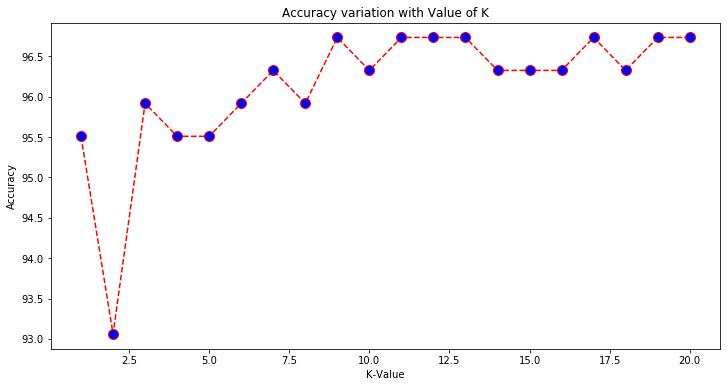

In [8]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy variation with Value of K')  
plt.xlabel('K-Value')  
plt.ylabel('Accuracy') 


In [9]:
# Support Vector Machines

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)

[[145   6]
 [  3  91]]
Accuracy score of train SVM
96.0352422907489
Accuracy score of test SVM
96.3265306122449
